In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import mean_squared_error
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('ccpp.csv')

In [6]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Data Preprocessing

In [40]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [41]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Attribute Information 
AT = Temperature ranging from 1.81C to 37.11C

V = Exhaust Vacuum in the range 25.36 to 81.56cm Hg

AP = Ambient Pressure ranging from 992.89 to 1033.30 milibar

RH = Relative Humidity in the range 25.56% to 100.16%

PE = Net hourly electrical energy output 420.26-495.76 MW

In [129]:
x = data[['AT','V','AP','RH']]
y = data['PE']
est = smf.OLS(y,x)
e = est.fit()
print(e.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                        0.00
Time:                        21:29:37   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [130]:
print(e.params)

AT   -1.678056
V    -0.272647
AP    0.502796
RH   -0.099927
dtype: float64


In [133]:
predictions = e.predict(x)
predictions

0       474.140813
1       445.496659
2       436.783795
3       453.204174
4       470.808839
           ...    
9563    462.730958
9564    424.690204
9565    463.426549
9566    456.738523
9567    447.916942
Length: 9568, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

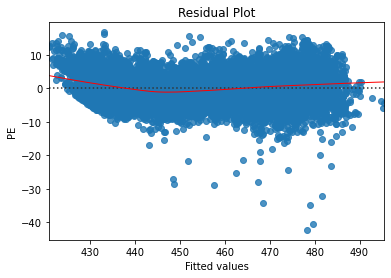

In [135]:
sns.residplot(predictions,'PE',data=data,lowess=True,
             line_kws = {'color':'red','lw':1,'alpha':1})
plt.xlabel("Fitted values")
plt.title("Residual Plot")

2. QQ Plot - To check whether the residuals are normally distributed

Text(0.5, 1.0, 'Normal Q-Q Plot')

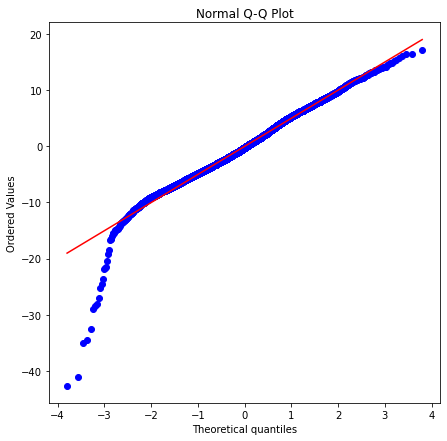

In [137]:
residuals = y - predictions
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

3. Scale-Location plot - To check homoscedasticity

Text(0.5, 0, 'Fitted value')

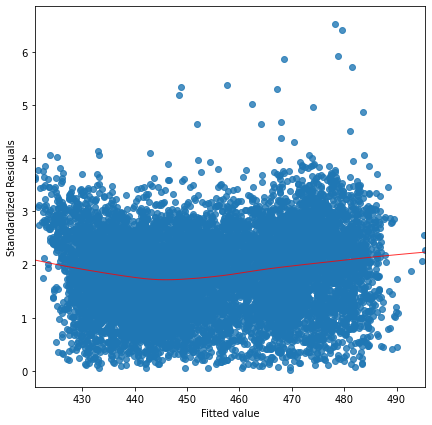

In [141]:
model_norm = np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(predictions,model_norm,scatter=True,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted value")

**To check model's accuracy**

In [144]:
print("Mean Squared Error: ", (e.mse_resid))

Mean Squared Error:  25.50073096027291


In [145]:
print("Root Mean Squared Error: ",np.sqrt(e.mse_resid))

Root Mean Squared Error:  5.049824844514204
